In [40]:
import pandas as pd
df = pd.read_csv('Results/news_VALE3.SA.csv')
display(df)

,link,title,content,date,polarity,subjectivity
0,/news/walt-disney-started-outperform-bernstein...,Walt Disney started with Outperform at Bernste...,Investing.com — Here is your Pro Recap of the ...,2023-10-06,0.097654,0.490982
1,/news/vale-vale-stock-drops-despite-220019733....,VALE S.A. (VALE) Stock Drops Despite Market Ga...,The most recent trading session ended with VAL...,2023-10-04,0.004432,0.478220
2,/news/wall-street-analysts-think-vale-13550486...,Wall Street Analysts Think VALE S.A. (VALE) Co...,VALE S.A. (VALE) closed the last trading sessi...,2023-09-29,0.102721,0.499225
3,/news/vale-vale-stock-sinks-market-220018144.html,VALE S.A. (VALE) Stock Sinks As Market Gains: ...,VALE S.A. (VALE) closed at $12.99 in the lates...,2023-09-27,-0.003319,0.472048
4,/news/vale-vale-port-acu-build-152900575.html,Vale (VALE) & Port of Acu to Build Low-Carbon ...,Vale S.A. VALE has signed a memorandum of unde...,2023-09-27,-0.050334,0.417609
5,/news/10-stocks-bounce-back-according-17141260...,10 Stocks that Will Bounce Back According to R...,US stock markets were wavering after latest in...,2023-09-24,0.082132,0.365959
6,/news/3-dividend-stocks-100-total-224240178.html,3 Dividend Stocks for 100% Total Returns by 2025,"Of course, there are fundamental factors for d...",2023-09-19,0.129662,0.478497
7,/news/vale-vale-gains-market-dips-220017362.html,VALE S.A. (VALE) Gains As Market Dips: What Yo...,VALE S.A. (VALE) closed at $14.12 in the lates...,2023-09-19,-0.000999,0.460022
8,/news/vale-vale-dips-more-broader-220020176.html,VALE S.A. (VALE) Dips More Than Broader Market...,VALE S.A. (VALE) closed the most recent tradin...,2023-09-12,-0.004792,0.420409
9,/news/3-bargain-blue-chip-stocks-112935827.html,3 Bargain Blue-Chip Stocks to Buy Under $20,"On the other hand, there are attractive blue-c...",2023-09-12,0.075004,0.493325


In [41]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Analise de sentimentos
Utilizando textblob

In [42]:

text = df['content'][1]
blob = TextBlob(text)


for sentence in blob.sentences:
    print(sentence)
    print(sentence.sentiment.polarity)
    print(sentence.sentiment.subjectivity)

print(blob.sentiment)

The most recent trading session ended with VALE S.A. (VALE) standing at $12.76, reflecting a -0.93% shift from the previouse trading day's closing.
0.25
0.375
This change lagged the S&P 500's daily gain of 0.81%.
0.0
0.0
Elsewhere, the Dow gained 0.39%, while the tech-heavy Nasdaq added 1.35%.
0.0
0.0
Shares of the company have depreciated by 7.2% over the course of the past month, outperforming the Basic Materials sector's loss of 7.36% and lagging the S&P 500's loss of 6.19%.
-0.125
0.1875
Analysts and investors alike will be keeping a close eye on the performance of VALE S.A. in its upcoming earnings disclosure.
0.0
0.0
In that report, analysts expect VALE S.A. to post earnings of $0.71 per share.
0.0
0.0
This would mark a year-over-year decline of 27.55%.
0.0
0.0
Meanwhile, our latest consensus estimate is calling for revenue of $11.23 billion, up 13.09% from the prior-year quarter.
0.5
0.9
For the entire fiscal year, the Zacks Consensus Estimates are projecting earnings of $2.05 p

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

start_date = df["date"][len(df.index) -1]
end_date = df["date"][0]


vale = yf.download(tickers = "VALE3.SA",
                  start = start_date,
                  end = end_date)

vale.reset_index(inplace=True)
vale.head()




[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-12,68.000000,68.260002,67.440002,67.620003,67.620003,14201300
1,2023-09-13,67.669998,67.779999,67.150002,67.360001,67.360001,15448400
2,2023-09-14,69.300003,70.680000,69.050003,70.120003,70.120003,62390300
3,2023-09-15,71.000000,71.230003,69.540001,69.540001,69.540001,37901700
4,2023-09-18,69.540001,70.050003,68.550003,68.720001,68.720001,21849000


Text(0.5, 1.0, 'VALE3.SA Close Price')

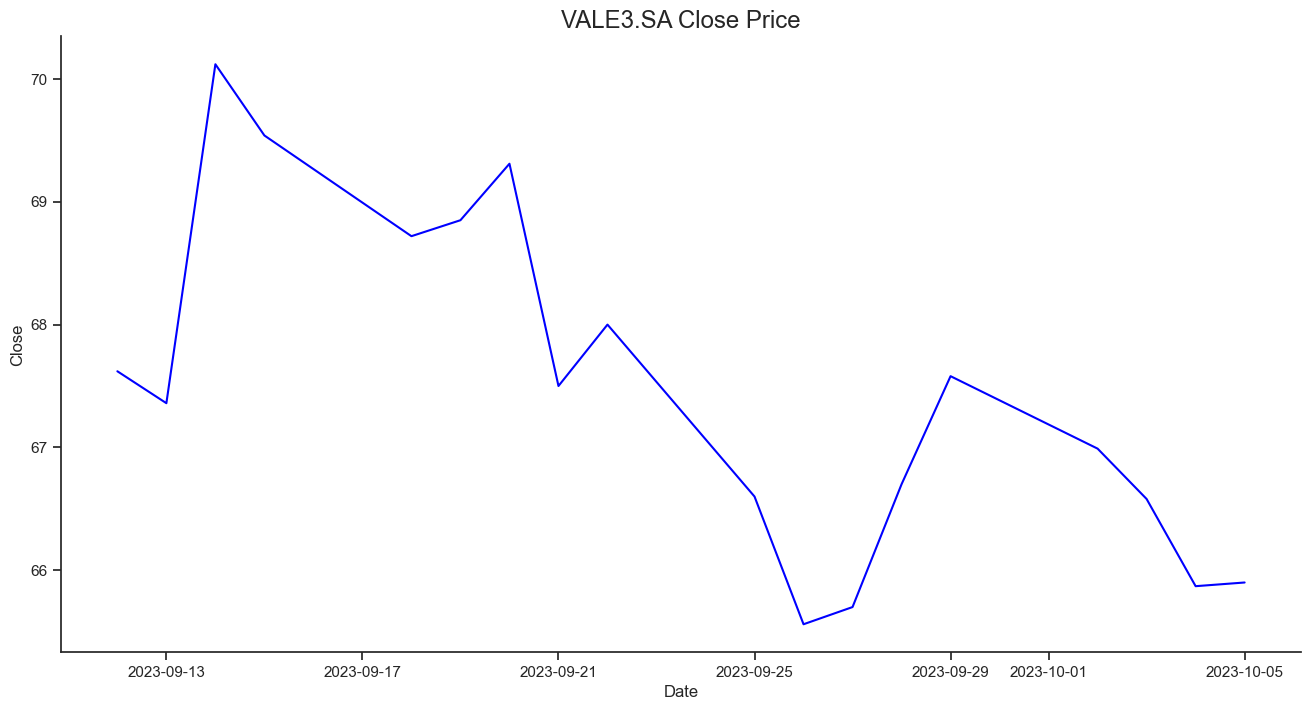

In [47]:
plt.figure(figsize=(16,8))
sns.set_style("ticks")
sns.lineplot(data=vale, x=vale["Date"], y=vale["Close"], color="blue")
sns.despine()
plt.title("VALE3.SA Close Price", size="x-large")